In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from pathlib import Path

data = Path('../data')
plotPath = Path('plots')

In [2]:
users = pd.read_csv(data / "UserList.csv")
users["user_id"].nunique(), users["location"].nunique()

(302673, 55280)

In [3]:
# users whose location is not null
users = users[users["location"].notnull()]
users["user_id"].nunique(), users["location"].nunique()

(156774, 55280)

In [6]:
locations = users["location"].unique()
len(locations)

55280

In [7]:
from functools import partial
from geopy.geocoders import Nominatim
from deep_translator import GoogleTranslator

import country_converter as coco
coco.logging.getLogger().setLevel(coco.logging.ERROR)


translator = GoogleTranslator(source="auto", target="en")
geolocator = Nominatim(user_agent="GoogleV3")
geocode = partial(geolocator.geocode, language="en")

def findCountry(location):
    if location.isdigit() : 
        print(location, "(is digit)")
        return ""
    
    try:
        result = geocode(location, timeout=5)
    except:
        print(location, "(geocode)")
        return ""
    if result is not None :
        country = result.address.split(",")[-1].strip()
        return country
    
    country = coco.convert(names=location, to='name_short')
    if country != "not found" :
        return country    
    
    translated = translator.translate(location)
    if translated is None:
        print(location, "(translation not found)")
        return ""
    if translated == location :
        print(location, "(not found)")
        return ""
    
    try:
        result = geocode(translated, timeout=5)
    except:
        print(location, "->", translated, "(geocode)")
        return ""
    if result is not None :
        country = result.address.split(",")[-1].strip()
        return country
    
    country = coco.convert(names=translated, to='name_short')
    if country != "not found" :
        return country    
    print(location, "->", translated, "(not found)")
    return ""

In [8]:
with open(data / "countries.pickle", "rb") as f:
    countries = pickle.load(f)

countries, len(countries)

(['India',
  'Philippines',
  'United States',
  'Mexico',
  'Malaysia',
  'Netherlands',
  'United States',
  'Poland',
  'Sweden',
  'United States',
  'United Kingdom',
  'Hungary',
  '',
  'United Kingdom',
  'Philippines',
  'United States',
  'Brazil',
  'Mexico',
  'Australia',
  'Canada',
  'United States',
  'United States',
  'United States',
  '',
  'United States',
  'Brazil',
  'Austria',
  'Canada',
  'Germany',
  'United States',
  '',
  'Canada',
  'Iran',
  'Romania',
  'Brazil',
  'Austria',
  'Russia',
  'Brazil',
  'United States',
  'United States',
  'Russia',
  '',
  'India',
  'Bulgaria',
  'Australia',
  'Argentina',
  'Egypt',
  'Brazil',
  'United States',
  '',
  '',
  'Philippines',
  'Brazil',
  'United States',
  'United States',
  'Portugal',
  'United States',
  'United States',
  'Poland',
  'Poland',
  'United States',
  'United States',
  'Venezuela',
  'France',
  'Netherlands',
  'United States',
  'Brazil',
  'Brazil',
  'Saudi Arabia',
  '',
  'U

In [9]:
with open(data / "location_to_country.pickle", "rb") as f:
    location_to_country = pickle.load(f)
location_to_country, len(location_to_country)

({'Chennai, India ': 'India',
  'Manila': 'Philippines',
  'Detroit,Michigan': 'United States',
  'Nayarit, Mexico': 'Mexico',
  'Malaysia, Kuantan': 'Malaysia',
  'Nijmegen, Nederland': 'Netherlands',
  'California': 'United States',
  'Poland': 'Poland',
  'Norberg Sweden': 'Sweden',
  'Nebraska': 'United States',
  'England,Manchester': 'United Kingdom',
  '~ Hungary ~': 'Hungary',
  'Where even am I': '',
  'United Kingdom': 'United Kingdom',
  'manila': 'Philippines',
  'home': 'United States',
  'socal =)': 'Brazil',
  'Mexico': 'Mexico',
  'Sydney Australia N.S.W': 'Australia',
  'Hamilton Ontario': 'Canada',
  'Nevada USA': 'United States',
  'Chicago, IL': 'United States',
  'San Jose, CA': 'United States',
  'somewhere really hot': '',
  'Guess': 'United States',
  'Camaragibe, Pernambuco': 'Brazil',
  'ａｕｓｔｒｉａ。': 'Austria',
  'Canada': 'Canada',
  'Rhineland-Palatinate, Germany': 'Germany',
  'Philadelphia PA': 'United States',
  'The Crimson World (England :P)': '',
  'Carb

In [11]:
df_location_country = pd.DataFrame.from_dict(
    location_to_country, orient="index", columns=["country"]
)
df_location_country.index.name = "location"
df_location_country = df_location_country.reset_index()
df_location_country.country = df_location_country.country.apply(lambda x: str(x))
df_location_country.to_csv(data / "location_to_country.csv", index=False)

df_location_country

,location,country
0,"Chennai, India",India
1,Manila,Philippines
2,"Detroit,Michigan",United States
3,"Nayarit, Mexico",Mexico
4,"Malaysia, Kuantan",Malaysia
...,...,...
55275,Żelkowo,Poland
55276,somewhere .....\{◕◡◕}/,China
55277,Poland:,Poland
55278,"nhollywood, california",


In [12]:
df_location_country_clean = df_location_country[
    ~df_location_country["country"].str.contains(",")
]
df_location_country_clean

# transform as a dictionary
location_country_clean = df_location_country_clean.set_index("location")["country"].to_dict()

# Users

In [13]:
users["country"] = users["location"].map(location_country_clean)
users

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,country
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0,India
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0,Philippines
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0,United States
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0,Mexico
5,terune_uzumaki,327311,5,5,0,0,0,15.20,Female,"Malaysia, Kuantan",1998-08-24,NaN,2010-05-10,2012-10-18 19:06:00,9.70,6.0,920.0,Malaysia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302658,Queenjdlols,3495411,4,123,6,4,49,22.55,Female,Head in the clouds body on the ground,NaN,NaN,2014-01-16,1900-04-29 00:19:00,6.77,3.0,1375.0,
302662,TheClockworkGuy,4273353,5,77,8,12,61,48.03,Male,Yharnam,NaN,NaN,2014-11-23,1900-05-22 02:49:00,6.85,0.0,2826.0,United States
302668,ichinitan,4531649,3,24,5,0,246,8.72,NaN,"Alexandria, Virginia",2000-05-12,NaN,2015-04-01,2017-10-12 14:22:00,9.46,0.0,528.0,United States
302671,Torasori,3975907,22,239,0,4,176,86.88,Male,"Latvia, Riga",1998-11-18,NaN,2014-07-30,2018-05-24 21:34:46,8.98,47.0,5313.0,Latvia


In [14]:
users["country"].value_counts()

United States                                  34854
                                               15457
Brazil                                          8234
Poland                                          8076
United Kingdom                                  7915
                                               ...  
676                                                1
France - La Réunion - Tromelin Island (EEZ)        1
St. Vincent and the Grenadines                     1
Soul Buoy                                          1
Kiribati                                           1
Name: country, Length: 252, dtype: int64

In [15]:
# number of users whose country is "" or is null
numUndefined = users[users["country"].isnull() | (users["country"] == "")]["user_id"].nunique()
print("Number of users whose country is undefined:", numUndefined, "(" + str(round(numUndefined/users["user_id"].nunique()*100, 2)) + "%)")

Number of users whose country is undefined: 15595 (9.95%)


In [16]:
# remove the users whose country is "" or is null
users = users[users["country"].notnull() & (users["country"] != "")]

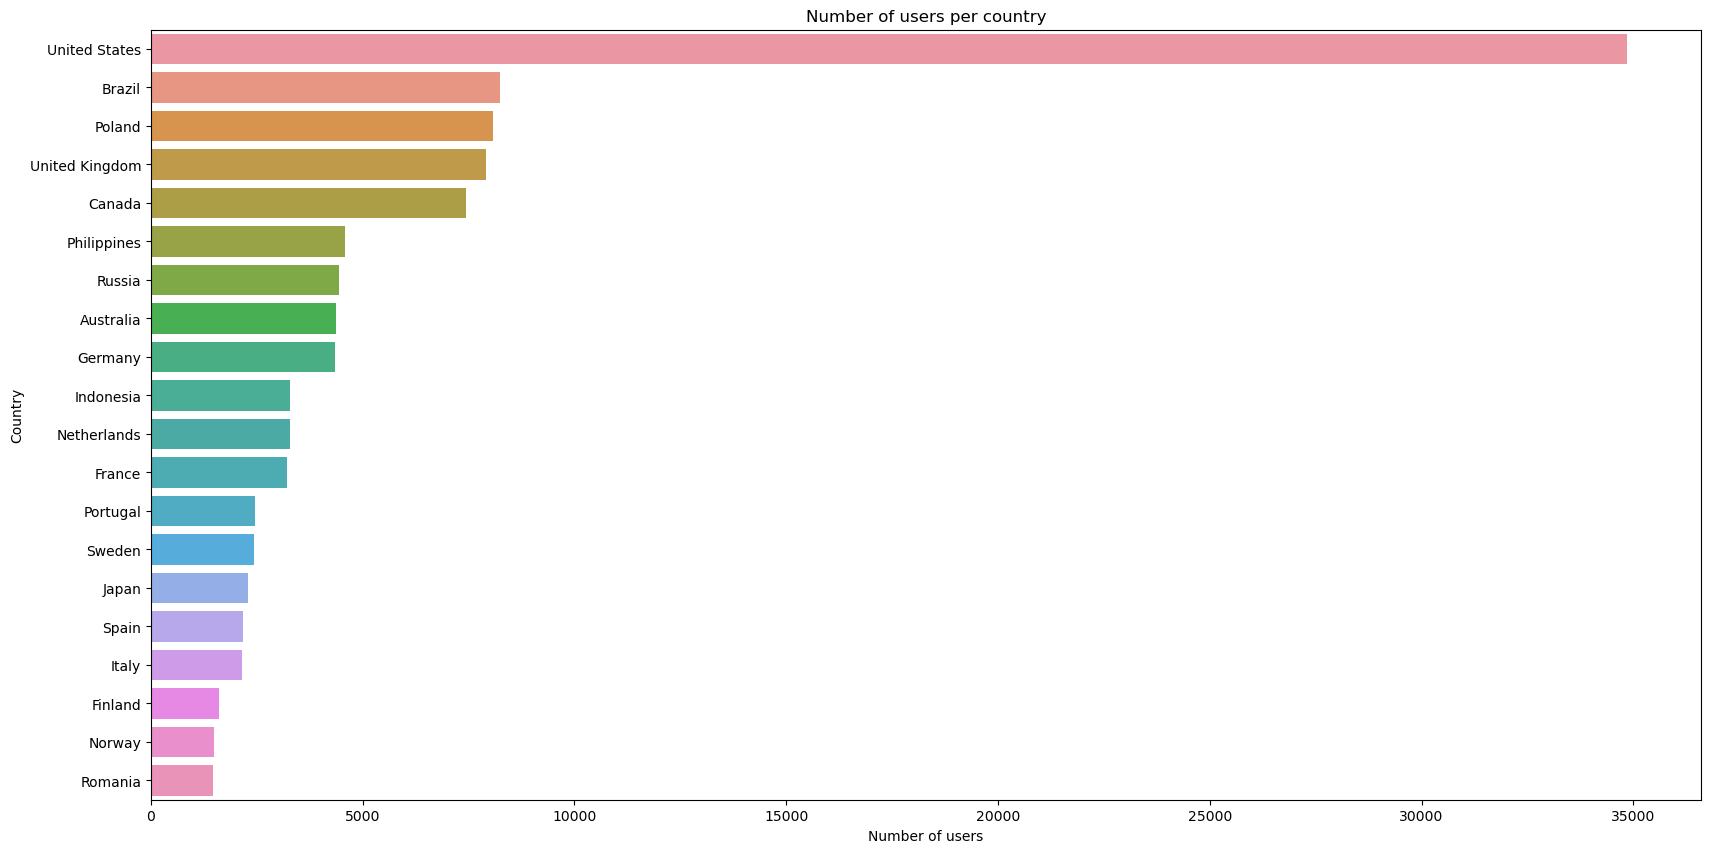

In [17]:
# histogram of the number of users per country
plt.figure(figsize=(20, 10))
plot = sns.countplot(y="country", data=users, order=users["country"].value_counts()[:20].index)

title = "Number of users per country"
plt.title(title)
plt.xlabel("Number of users")
plt.ylabel("Country")
plt.show()
plot.get_figure().savefig(data / plotPath / title + ".png")

In [18]:
# number of users in France
users[users["country"] == "France"]["user_id"].nunique()


3214

# Studios

In [19]:
df_animes = pd.read_csv(data / "AnimeList.csv")
df_animes.head(5)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [20]:
import dask.dataframe as dd

df_rating = dd.read_csv(data /
    "UserAnimeList.csv",
    dtype={
        "username": "object",
        "anime_id": "int64",
        "my_watched_episodes": "int64",
        "my_start_date": "str",
        "my_finish_date": "str",
        "my_score": "int64",
        "my_status": "int64",
        "my_rewatching": "float64",
        "my_rewatching_ep": "int64",
        "my_last_updated": "int64",
        "my_tags": "object",
    },
    usecols=[
        "username",
        "anime_id",
        "my_watched_episodes",
        "my_start_date",
        "my_finish_date",
        "my_score",
        "my_status",
        "my_rewatching",
        "my_rewatching_ep",
        "my_last_updated",
        "my_tags",
    ],
    storage_options={"anon": True},
    blocksize="16 MiB",
).persist()

df_rating

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
npartitions=297,,,,,,,,,,,
,object,int64,int64,object,object,int64,int64,float64,int64,int64,object
,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...


In [21]:
df_rating = df_rating[['username', 'anime_id', 'my_score']]
df_rating

,username,anime_id,my_score
npartitions=297,,,
,object,int64,int64
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


In [22]:
df_animes.drop(columns=["title_english", "title_japanese", "title_synonyms", "status", "airing", "aired_string", "aired", "duration", "rating", "scored_by", "rank", "popularity", "members", "background", "favorites", "broadcast", "related", "producer", "opening_theme", "ending_theme"], inplace=True)
df_animes

,anime_id,title,image_url,type,source,episodes,score,premiered,licensor,studio,genre
0,11013,Inu x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,7.63,Winter 2012,Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,7.89,Spring 2007,Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,7.55,Fall 2008,NaN,Satelight,"Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,8.21,Summer 2002,ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,8.67,Fall 2012,NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen"
...,...,...,...,...,...,...,...,...,...,...,...
14473,26089,Gutchonpa Omoshiro Hanashi,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,5,5.50,Fall 1987,NaN,NaN,Kids
14474,21525,Geba Geba Shou Time!,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,1,4.60,NaN,NaN,NaN,Comedy
14475,37897,Godzilla: Hoshi wo Kuu Mono,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Other,1,0.00,NaN,NaN,NaN,"Action, Sci-Fi, Adventure, Fantasy"
14476,34193,Nippon Mukashibanashi: Sannen Netarou,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,1,6.00,NaN,NaN,NaN,"Fantasy, Kids"


In [23]:
df_users_ratings = df_rating.merge(users[["username", "user_id", "gender", "country", "birth_date", "join_date", "stats_mean_score", "stats_episodes"]], left_on="username", right_on="username").persist()
df_users_ratings

,username,anime_id,my_score,user_id,gender,country,birth_date,join_date,stats_mean_score,stats_episodes
npartitions=297,,,,,,,,,,
,object,int64,int64,int64,object,object,object,object,float64,float64
,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...


In [24]:
df_studios = df_users_ratings.merge(df_animes, left_on="anime_id", right_on="anime_id").persist()
df_studios

,username,anime_id,my_score,user_id,gender,country,birth_date,join_date,stats_mean_score,stats_episodes,title,image_url,type,source,episodes,score,premiered,licensor,studio,genre
npartitions=297,,,,,,,,,,,,,,,,,,,,
,object,int64,int64,int64,object,object,object,object,float64,float64,object,object,object,object,int64,float64,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [25]:
df_studios["country"].value_counts().compute()

United States                     9565621
Poland                            2710217
Brazil                            2602788
Canada                            2314627
United Kingdom                    2170412
                                   ...   
Federated States of Micronesia         36
Central African Republic               21
Christmas Island                       17
Anguilla                                9
Saint-Martin                            3
Name: country, Length: 248, dtype: int64

In [26]:
df_studios["studio"].value_counts().compute()

Madhouse                         2569187
J.C.Staff                        2354736
A-1 Pictures                     1824887
Studio Deen                      1675881
Sunrise                          1635412
                                  ...   
Takara Tomy A.R.T.S                   11
pH Studio, D &amp; D Pictures         11
TriF Studio                            4
33 Collective                          4
Studio LAN                             3
Name: studio, Length: 778, dtype: int64

In [27]:
df_studios["user_id"].nunique().compute()

137499

In [28]:
# Aggregate for each Studio the counts for each country
df_studios_countries = (
    df_studios.groupby(["studio", "country"])
    .agg({"user_id": "count"})
    .rename(columns={"user_id": "num_ratings"})
).compute()  # .reset_index()
df_studios_countries

num_ratings
studio                       country                            
10Gauge                      Argentina                         8
                             Australia                        26
                             Belgium                           8
                             Bosnia and Herzegovina            1
                             Brazil                           49
...                                                          ...
ufotable                     Kiribati                         21
                             Penguin Island                    7
                             Pitcairn Islands                 12
                             San Marino                        1
ufotable, feel., Studio Flag Bolivia                           1

[90169 rows x 1 columns]

In [29]:
# In df_test, for each Studio, sort the countries by the number of ratings
#df_studios_countries = df_studios_countries.groupby(level=0).apply(
#    lambda x: x.sort_values("num_ratings", ascending=False)
#)
df_studios_countries.reset_index(inplace=True)
df_studios_countries.sort_values(by=['num_ratings'], ascending=False, inplace=True)
df_studios_countries.head(70)
#df_studios_countries[df_studios_countries['num_ratings'] >= 500]['Studio'].value_counts()

,studio,country,num_ratings
26251,Madhouse,United States,566186
21289,J.C.Staff,United States,518818
50036,Sunrise,United States,396743
410,A-1 Pictures,United States,379066
44649,Studio Deen,United States,363597
...,...,...,...
35686,Production I.G,United Kingdom,79648
8609,Bones,Canada,79510
54907,Toei Animation,United Kingdom,78410
25323,Lerche,United States,77859


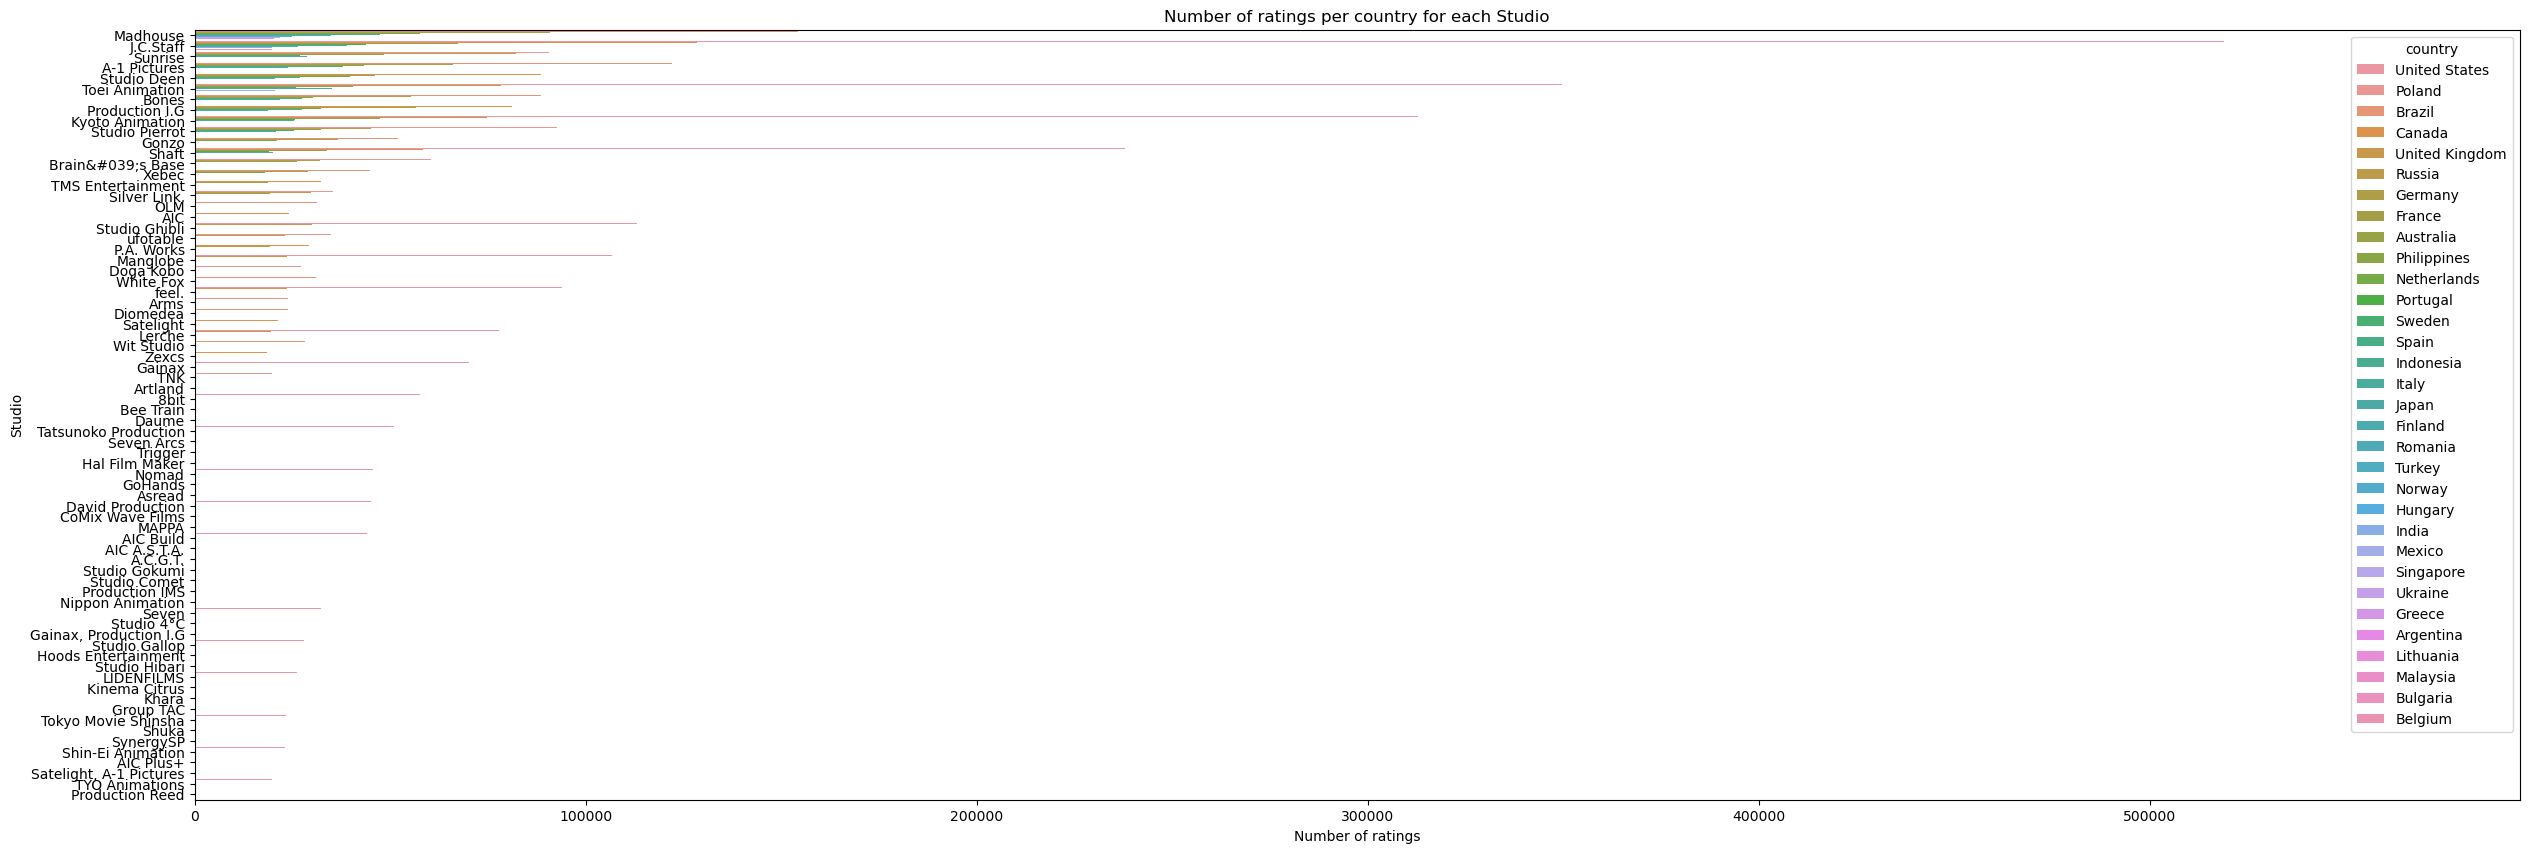

In [30]:
# plot df_studios_countries
plt.figure(figsize=(30, 10))
sns.barplot(
    x="num_ratings",
    y="studio",
    hue="country",
    data=df_studios_countries[df_studios_countries['num_ratings'] >= 18000],
    order=df_studios_countries[df_studios_countries['num_ratings'] >= 18000]["studio"].unique(),
)
plt.title("Number of ratings per country for each Studio")
plt.xlabel("Number of ratings")
plt.ylabel("Studio")
plt.show()
# number of ratings per Studio
#df_studios_countries.groupby("Studio").sum()


In [31]:
df_studio_per_country = df_studios_countries.copy()[['studio', 'country']]
df_studio_per_country = df_studio_per_country.groupby(['studio']).count()
df_studio_per_country.reset_index(inplace=True)
df_studio_per_country.sort_values(by=['country'], ascending=False, inplace=True)
df_studio_per_country.head()

,studio,country
604,Studio Pierrot,246
102,Bones,246
261,J.C.Staff,246
305,Kyoto Animation,245
563,Studio Deen,245


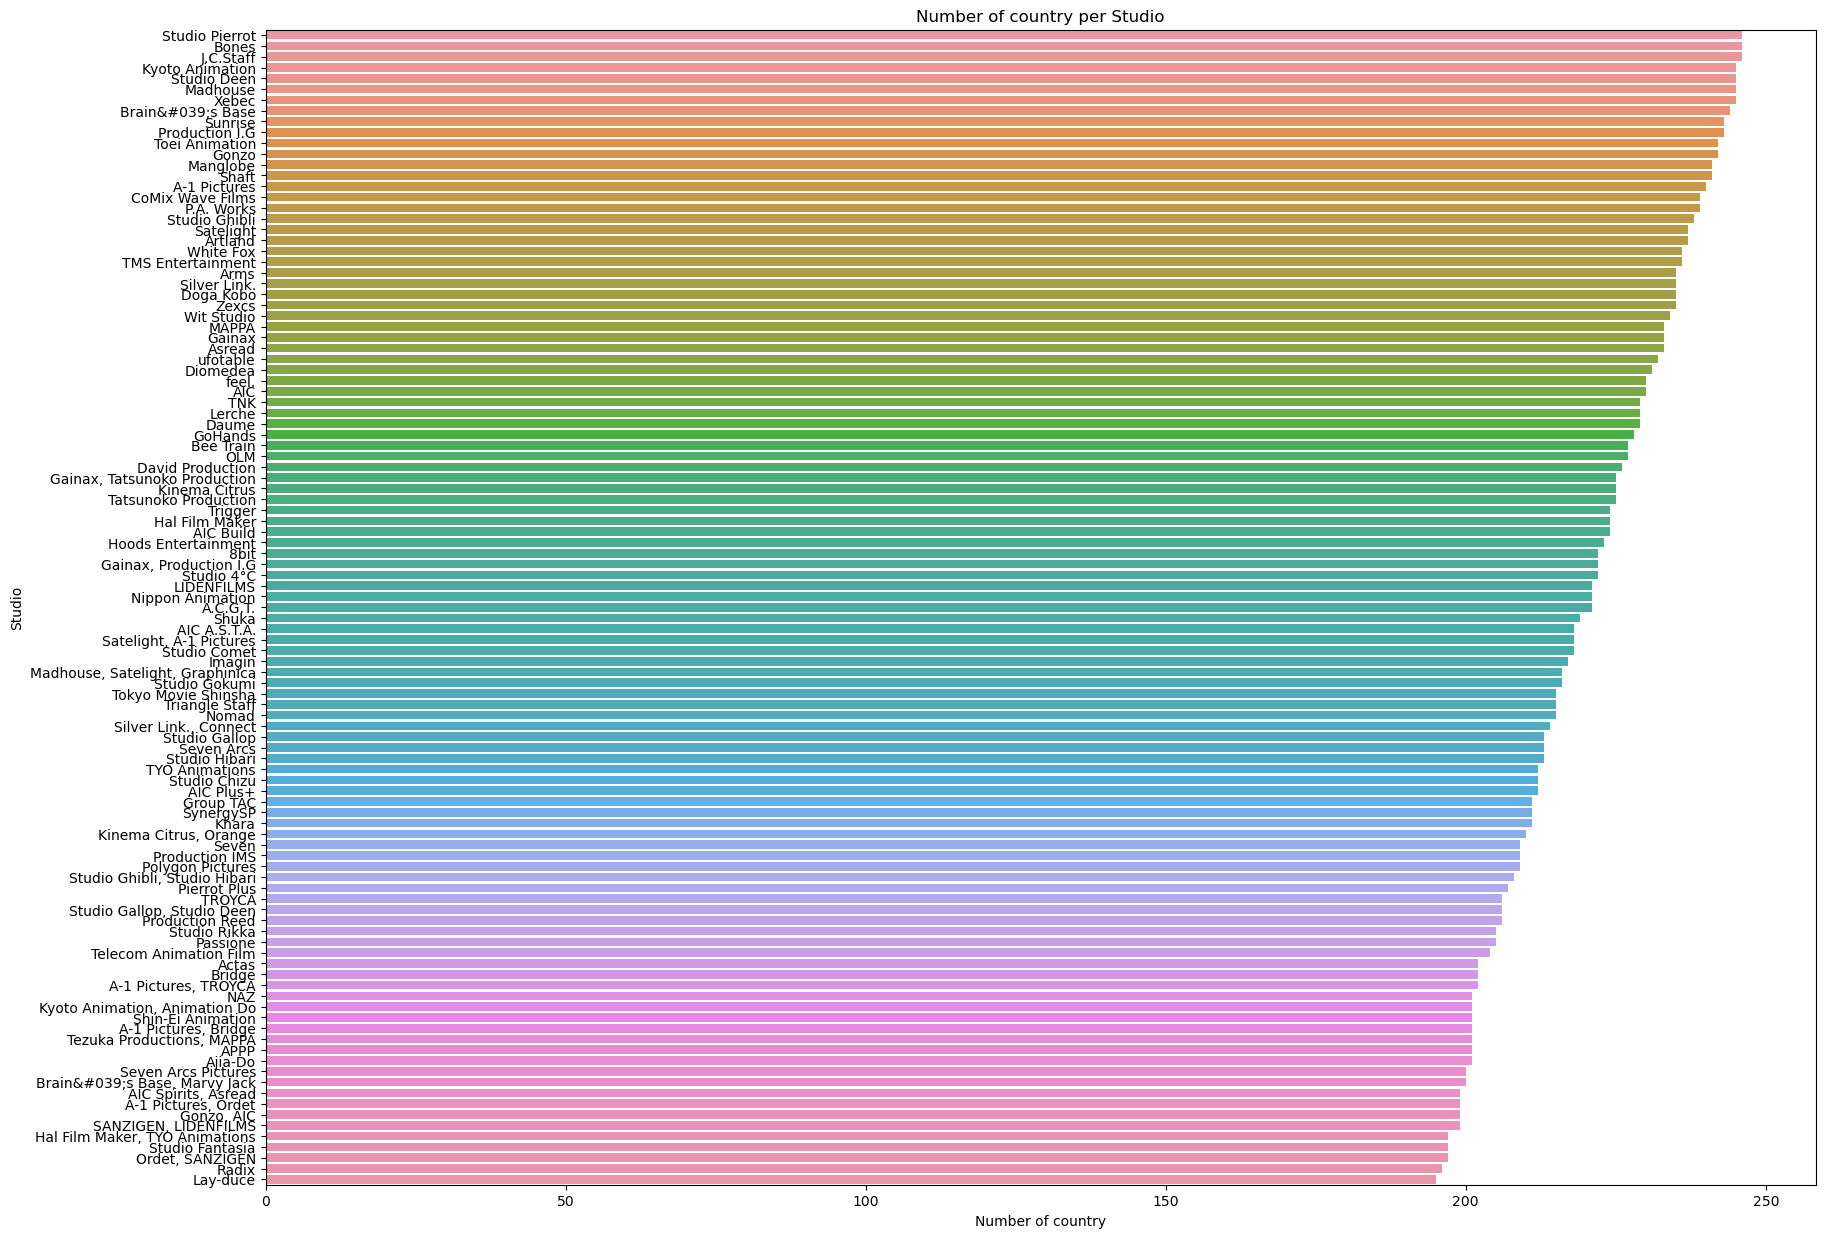

In [32]:
plt.figure(figsize=(20, 15))
plot = sns.barplot(
    x="country",
    y="studio",
    data=df_studio_per_country[df_studio_per_country['country'] >=195],
    order=df_studio_per_country[df_studio_per_country['country'] >=195]["studio"].unique(),
)
plt.title("Number of country per Studio")
plt.xlabel("Number of country")
plt.ylabel("Studio")
plt.show()
plot.get_figure().savefig(data / plotPath / "Number of country per Studio.png")

In [33]:
# Print for Studio == "MADHOUSE"
df_studios_countries[df_studios_countries['studio'] == "Madhouse"].head(10)

,studio,country,num_ratings
26251,Madhouse,United States,566186
26209,Madhouse,Poland,162244
26097,Madhouse,Brazil,154398
26105,Madhouse,Canada,136425
26250,Madhouse,United Kingdom,132370
26215,Madhouse,Russia,110624
26135,Madhouse,Germany,90876
26131,Madhouse,France,73638
26085,Madhouse,Australia,72856
26189,Madhouse,Netherlands,57597


In [34]:
df_studios_countries[df_studios_countries['studio'] == "A-1 Pictures"].head(10)

,studio,country,num_ratings
410,A-1 Pictures,United States,379066
263,A-1 Pictures,Brazil,121987
371,A-1 Pictures,Poland,113980
269,A-1 Pictures,Canada,98385
409,A-1 Pictures,United Kingdom,91379
299,A-1 Pictures,Germany,65972
376,A-1 Pictures,Russia,57198
251,A-1 Pictures,Australia,54811
295,A-1 Pictures,France,54105
313,A-1 Pictures,Indonesia,46418


In [35]:
df_studios_sum_ratings = df_studios_countries.copy()
df_studios_sum_ratings = df_studios_sum_ratings[['studio', 'num_ratings']].groupby(['studio']).sum()
df_studios_sum_ratings.reset_index(inplace=True)
df_studios_sum_ratings.sort_values(by=['num_ratings'], ascending=False, inplace=True)
df_studios_sum_ratings.head(10)

,studio,num_ratings
329,Madhouse,2569187
261,J.C.Staff,2354736
4,A-1 Pictures,1824887
563,Studio Deen,1675881
634,Sunrise,1635412
698,Toei Animation,1620522
453,Production I.G,1559850
102,Bones,1473523
305,Kyoto Animation,1433198
604,Studio Pierrot,1315533


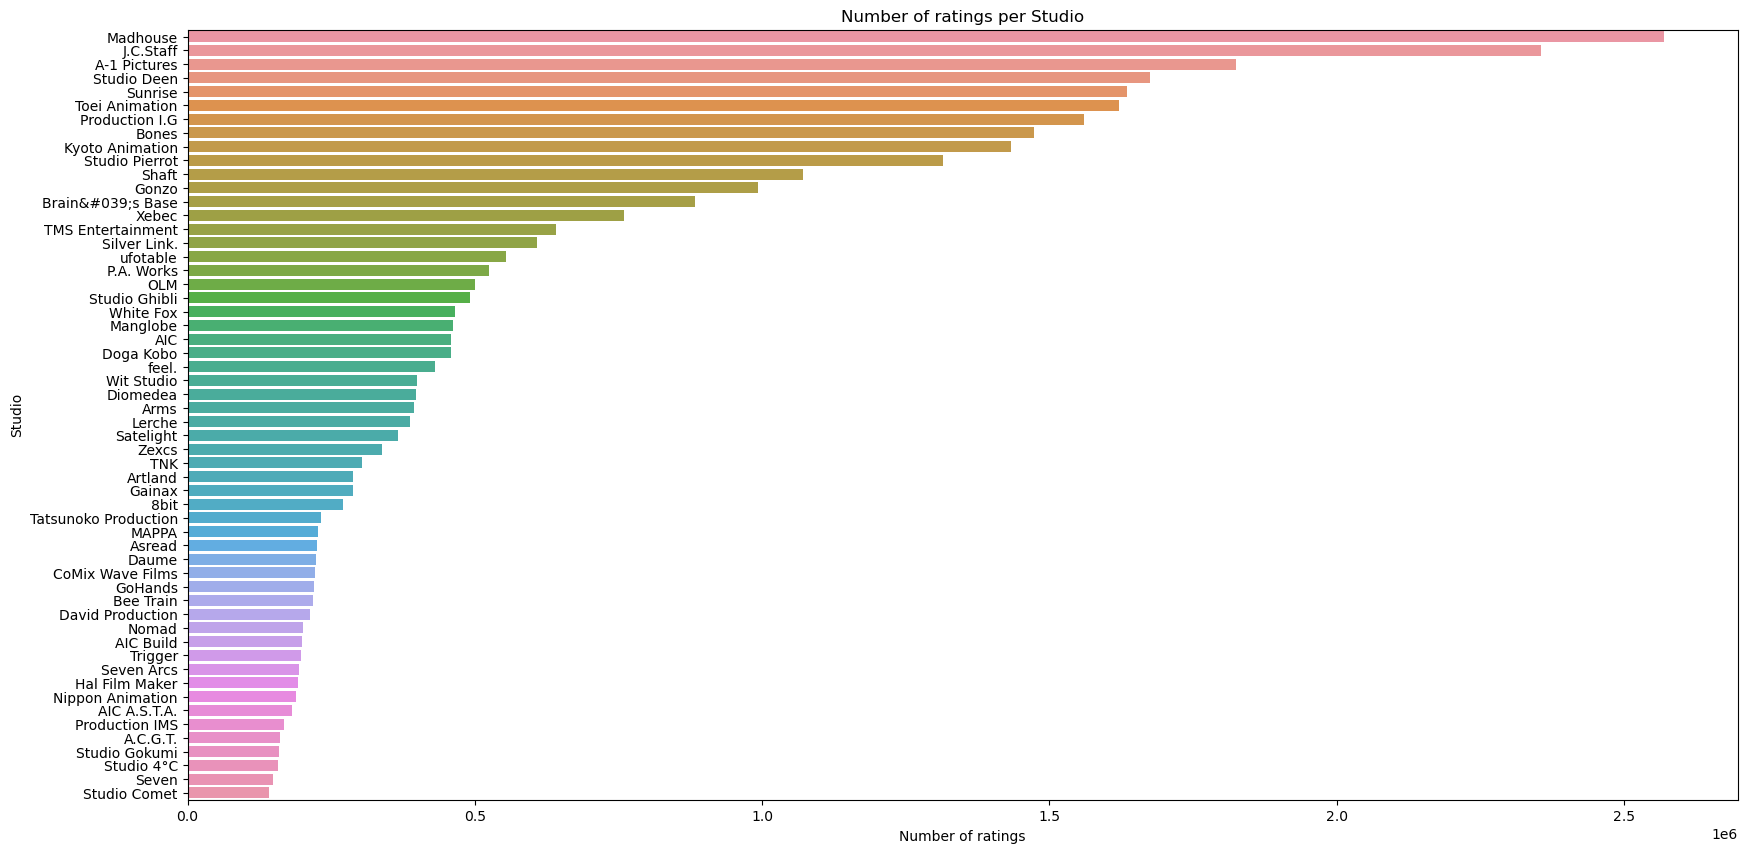

In [36]:
plt.figure(figsize=(20, 10))
plot = sns.barplot(
    x="num_ratings",
    y="studio",
    data=df_studios_sum_ratings[df_studios_sum_ratings['num_ratings'] >= 140000],
    order=df_studios_sum_ratings[df_studios_sum_ratings['num_ratings'] >= 140000]["studio"].unique(),
)
plt.title("Number of ratings per Studio")
plt.xlabel("Number of ratings")
plt.ylabel("Studio")
plt.show()
plot.get_figure().savefig(data / plotPath / "Number of ratings per Studio.png")